[View in Colaboratory](https://colab.research.google.com/github/thochewa/GoogleColab/blob/master/TwoLabel_ImageClassifier_Colab_pytorchFastAI.ipynb)

#  Image classification / Two Labels / Convolutional Neural Networks

The script is intended to run on [Google Colab](https://colab.research.google.com). This requires installing pytorch and fastai packages always in the beginning.

In [2]:
# Preparing environment for GoogleColab
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision 
!pip install fastai --upgrade
!pip install pillow --upgrade

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
kaggle-cli 0.12.13 has requirement lxml<4.1,>=4.0.0, but you'll have lxml 4.2.1 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
kaggle-cli 0.12.13 has requirement lxml<4.1,>=4.0.0, but you'll have lxml 4.2.1 which is incompatible.
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (0.6)
Requirement not upgraded as not directly required: PyYAML in /usr/local/lib/python3.6/dist-packages (from fastai) (3.12)
Requirement not upgraded as not directly required: certifi in /usr/local/lib/python3.6/dist-packages (from fastai) (2018.4.16)
Requirement not upgraded as not directly required: ipython-genutils in /usr/local/lib/python3.6/dist-packages (from fastai) (0.2.0)
Requirement not upgraded as not directly required: pandas in /usr/local/lib/python3.6/dist-packages (from fastai) (0.22.0)
Requiremen

Requirement not upgraded as not directly required: parso>=0.2.0 in /usr/local/lib/python3.6/dist-packages (from jedi->fastai) (0.2.0)
Requirement not upgraded as not directly required: requests in /usr/local/lib/python3.6/dist-packages (from torchtext->fastai) (2.18.4)
Requirement not upgraded as not directly required: palettable in /usr/local/lib/python3.6/dist-packages (from mizani>=0.4.1->plotnine->fastai) (3.1.0)
Requirement not upgraded as not directly required: stevedore>=1.20.0 in /usr/local/lib/python3.6/dist-packages (from cliff<2.9,>=2.8.0->kaggle-cli->fastai) (1.28.0)
Requirement not upgraded as not directly required: pbr!=2.1.0,>=2.0.0 in /usr/local/lib/python3.6/dist-packages (from cliff<2.9,>=2.8.0->kaggle-cli->fastai) (4.0.2)
Requirement not upgraded as not directly required: PrettyTable<0.8,>=0.7.1 in /usr/local/lib/python3.6/dist-packages (from cliff<2.9,>=2.8.0->kaggle-cli->fastai) (0.7.2)
Requirement not upgraded as not directly required: cmd2>=0.6.7 in /usr/local/li

## Task: build a model to reenter the Kaggle 'Dogs vs Cats' competition

The data comprises of 25,000 labelled dog and cat photos available for training; 12,500 have to be labeled for this competition. Benchmark for the 2013 competition was 80% - so anything above this would be awesome!

In [0]:
# Run kill function to clean Colab environment
# !kill -9 -1

# Automatic reloading and inline plotting /
#%reload_ext autoreload
#%autoreload 2
%matplotlib inline

The below code loades the required libraries

In [0]:
# This file contains all external libs to use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

`PATH` sets the path to the data - since this is running in colab, we always have to re-create the dirctory as well. `sz` is the image sizing parameter so that the training runs quickly.

In [0]:
PATH = "data/dogscats/"
sz=224

In [7]:
# Load external data from fast.ai
!mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip dogscats.zip -d data/


mkdir: cannot create directory ‘data’: File exists


## First step: look at the data

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'cats' and 'dogs').

In [8]:
os.listdir(PATH)

['valid', 'test1', 'sample', 'models', 'train']

In [9]:
os.listdir(f'{PATH}train')

['cats', 'dogs']

In [10]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.1047.jpg',
 'cat.4850.jpg',
 'cat.12077.jpg',
 'cat.6491.jpg',
 'cat.11347.jpg']

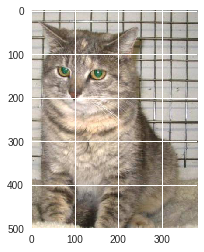

In [11]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

Here is how the raw data looks like

In [12]:
img.shape

(500, 382, 3)

In [13]:
img[:4,:4]

array([[[210, 201, 196],
        [209, 200, 195],
        [209, 200, 195],
        [209, 200, 195]],

       [[208, 199, 194],
        [207, 198, 193],
        [206, 197, 192],
        [204, 195, 190]],

       [[208, 200, 197],
        [208, 200, 197],
        [206, 198, 195],
        [205, 197, 194]],

       [[200, 195, 191],
        [201, 196, 192],
        [201, 196, 192],
        [201, 196, 192]]], dtype=uint8)

## First model

The <b>pre-trained</b> CNN ImageNet (1.2 mio images in 1000 classes) model is a starting point. Specifically, this is the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. More info on [resnet models](https://github.com/KaimingHe/deep-residual-networks) here

Here's how to train and evalulate a *dogs vs cats* model in 3 lines of code, and under 20 seconds:

In [14]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 57443695.65it/s]


100%|██████████| 32/32 [00:12<00:00,  2.57it/s]


[0.      0.0528  0.02524 0.99072]
[1.      0.05378 0.03274 0.99072]



The results show an accuracy of over 99% in less than 20 seconds with GPU accelaration - **BOOM!**

## Results in more details: what worked and what didn't work?

Important to take a look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [0]:
# Check lables for the data set
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
# this means 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [0]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [0]:
log_preds[:10]

array([[ -0.11521,  -2.21802],
       [ -0.08977,  -2.45501],
       [ -0.00003, -10.29482],
       [ -0.06168,  -2.81649],
       [ -0.00004, -10.13546],
       [ -0.00008,  -9.41464],
       [ -0.00003, -10.38251],
       [ -0.00003, -10.47891],
       [ -0.00148,  -6.51499],
       [ -0.00003, -10.31722]], dtype=float32)

The following funcions are fast.ai helper functions to make plotting easier.

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


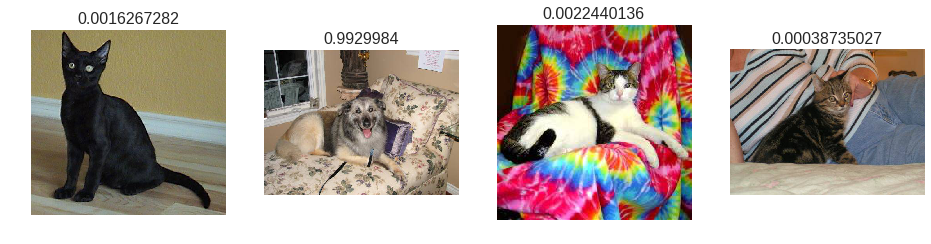

In [0]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


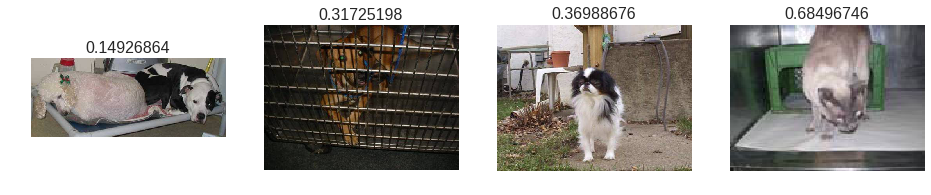

In [0]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


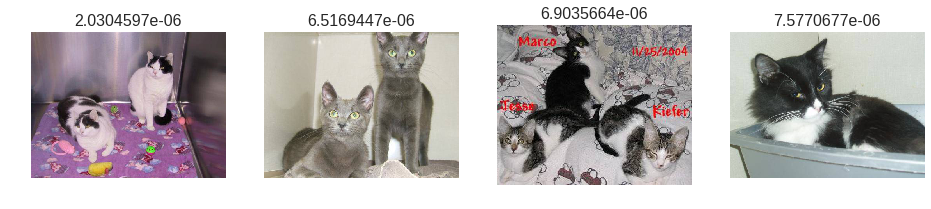

In [0]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


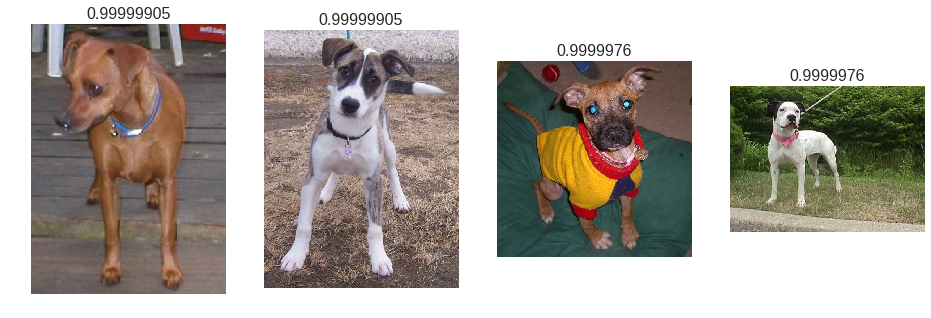

In [0]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


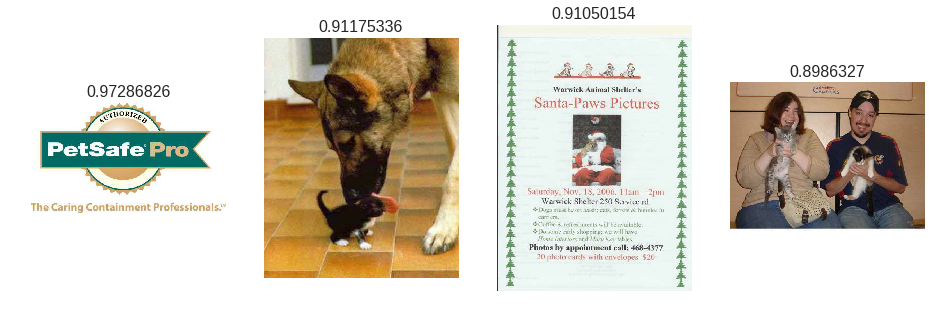

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


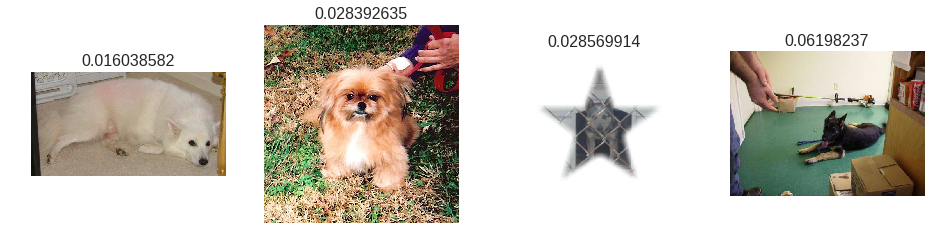

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


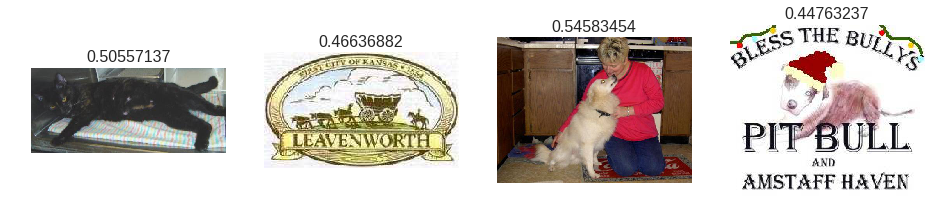

In [0]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

# Tuning the model

## Choosing a learning rate

The *learning rate* determines the speed of updating the *weights* (or *parameters*) - changing it significantly affects model performance.

The method `learn.lr_find()` identifies an optimal learning rate by increasing the learning rate from a small amount to a larger amount until the loss function stops decreasing (for more details see here [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186)).

Plotting the learning rate across batches helps to see what it looks like.

Creating a new learner allows setting the learning rate for a new (untrained) model.

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
lrf=learn.lr_find()

 83%|████████▎ | 300/360 [00:08<00:01, 35.09it/s, loss=0.468]


The `learn` object attribute `sched` contains the learning rate scheduler, and has some convenient plotting functionality

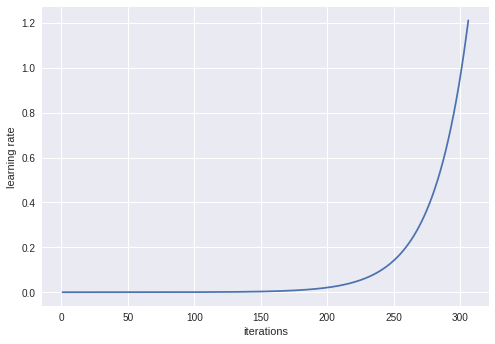

In [0]:
learn.sched.plot_lr()

Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/num_iterations) of SGD.

The plot attribute shows the loss versus learning rate to see where the loss stops decreasing:

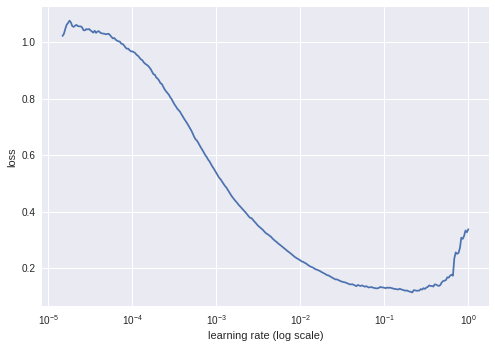

In [0]:
learn.sched.plot()

The loss is still improving at lr=1e-2 (0.01), so that's the starting point. Re-run during training as the optimal learning rate can change.

## Data augmentation and learning rate annealing

### Data augmentation

Problem with more epoche training: *overfitting*, i.e., the model is learning to recognize the specific images in the training set, rather than generalizing for good results on the validation set. 

One solution: effectively create more data through *data augmentation*, i.e., randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

Different functions can be used: passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`. For images, a pre-defined list of functions `transforms_side_on` can be used or randomly zooming into images up to a specified scale by adding the `max_zoom` parameter.

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

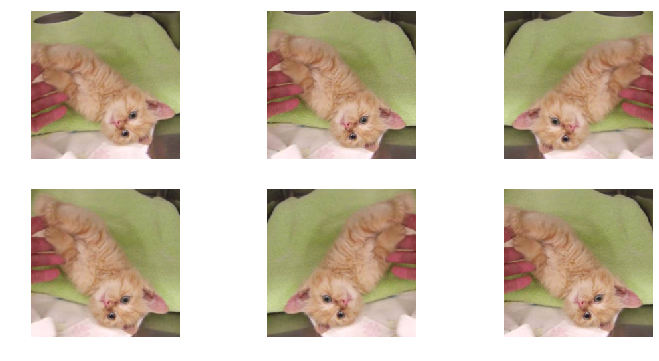

In [0]:
plots(ims, rows=2)

The below `data` object includes the augmentation

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
learn.fit(1e-2, 1)

[0.      0.06176 0.03258 0.98877]



In [0]:
learn.precompute=False

In a learner, all but the last layers are *frozen*, so only the weights in the last layer are updated when `fit` is called.

The `cycle_len` parameter defines *stochastic gradient descent with restarts (SGDR)*, a variant of *learning rate annealing*. The learning rate is gradually decreasing as training progresses.

Known issues are low resilience, i.e., small changes to the weights may result in big changes to the loss. Therefore, and to find the weight space that is accurate and stable, learning rate is increased (this is the 'restarts' in 'SGDR') to force the model to jump to a different part of the weight space if the current area is "spikey". This paper refers to it as "cyclic LR schedule"):

<img src="images/sgdr.png" width="80%">
(From the paper [Snapshot Ensembles](https://arxiv.org/abs/1704.00109)).

`cycle_len` is used to specify the number of epochs between resetting the learning rate, and the number of times this happens is refered to as the *number of cycles*. The latter is the 2nd parameter passed to `fit()` (here 3).

In [0]:
learn.fit(1e-2, 3, cycle_len=1)

  5%|▌         | 19/360 [00:10<03:00,  1.89it/s, loss=0.0501]

/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


[0.      0.04429 0.02962 0.98828]


[1.      0.03739 0.02834 0.98682]
[2.      0.04096 0.02925 0.98877]



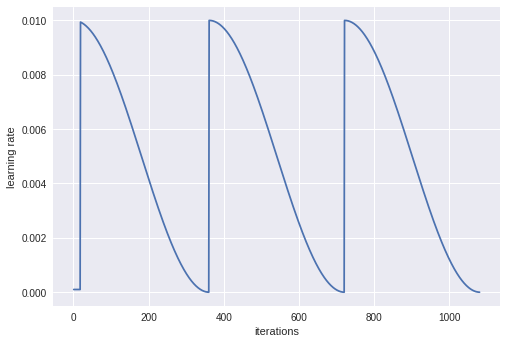

In [0]:
learn.sched.plot_lr()

Not much improvement - no point to further training the last layer on its own. Save model to use it again later.

In [0]:
## to save locally in Colab
learn.save('224_lastlayer')
learn.load('224_lastlayer')

### Fine-tuning low layers and differential learning rate annealing

With a good final layer trained, focus is on the other layers. `unfreeze()` tells the learner to unfreeze the remaining layers

In [0]:
learn.unfreeze()

The earlier layers have more general-purpose features and probably need less fine-tuning for new datasets. Hence, different learning rates for different layers are used: the first few layers will be at 1e-4, the middle layers at 1e-3, and the FC layers will have 1e-2 as before. 

This is referred to as *differential learning rates*.

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [0]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  2%|▏         | 7/360 [00:09<07:43,  1.31s/it, loss=0.0835]

/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


[0.      0.04521 0.02457 0.99268]


[1.      0.04048 0.02207 0.98926]
[2.      0.03469 0.02062 0.99219]
 33%|███▎      | 119/360 [02:10<04:24,  1.10s/it, loss=0.0333]

[3.      0.03373 0.02152 0.99268]
[4.      0.02101 0.02107 0.99268]
  1%|          | 3/360 [00:06<13:13,  2.22s/it, loss=0.0206]

[5.      0.02106 0.02173 0.99219]
[6.      0.01868 0.0228  0.99072]



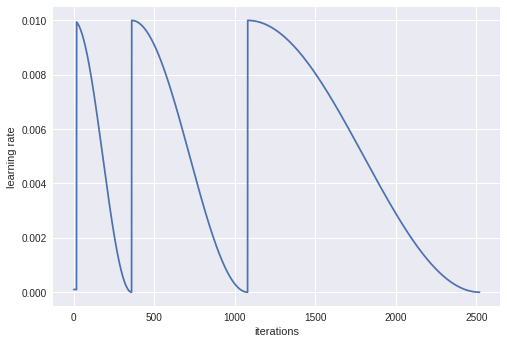

In [0]:
learn.sched.plot_lr()

The plot above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates: `lr=np.array([1e-4,1e-3,1e-2])`. The`cycle_mult=2' restarts the increasing learning rate cycle, hence, allows the loss function to find robust local minima more quickly.

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

### Test Time Augmentation
TTA makes predictions not just on the images in the validation set, but also on a number of randomly augmented versions of them and then averages predictions from these images.

In [0]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


In [0]:
probs = log_preds
def accuracy_np(preds, targs):
  preds = np.argmax(preds, 1)
  return (preds==targs).mean()

accuracy_np(probs, y)

0.9935

A 10-20% reduction in error on this dataset.. not bad!

## Analyzing results

### Confusion matrix 

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

Plotting Scikit-learn's confusion matrix:

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[997   3]
 [ 10 990]]


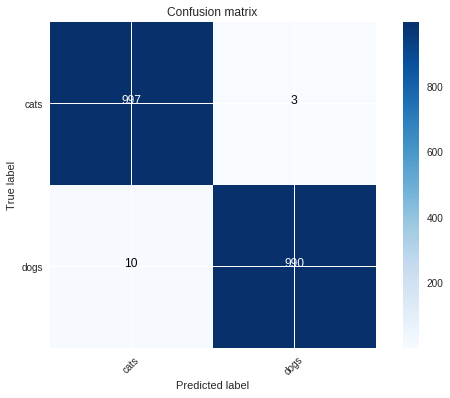

In [0]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect cats


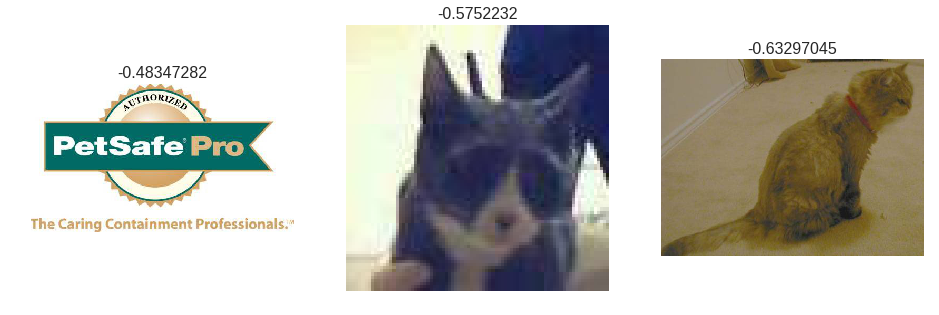

In [0]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


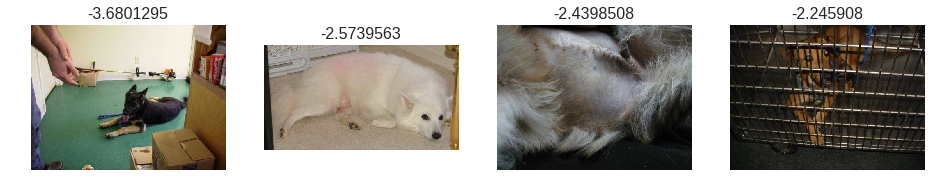

In [0]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")